<h4>
1. Сделать EDA (Exploratory Data Analysis – разведочный анализ данных).

2. Проверить статистическую гипотезу: жанр комедия имеет самую высокую оценку с доверительным интервалом 99%.
    
3. Проверить гипотезу: гипотеза в зависимости от динамики оценок (до 1990 года оценки были ниже с alpha=5).

Проверить, работает ли нормальное распределение и Паретто 
    (с Паретто я не смог справиться, а нормальное распределение только на графике оценил, при чем мне не понятно где границы нормальности, что можно считать нормальным, а что нет?).
    
Прогноз выхода новых фильмов в год по жанрам (сверить с фактом).

In [56]:
import zipfile
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pylab
from math import sqrt
import math
import re

In [2]:
path='C:\Datasets\imdb-dataset.zip'
zipfile.is_zipfile(path)

True

In [3]:
z = zipfile.ZipFile(path, 'r')
z.printdir()

File Name                                             Modified             Size
name.basics.tsv.gz                             2019-11-21 01:48:02    189064698
name.basics.tsv/name.basics.tsv                2019-11-21 01:48:26    579743523
title.akas.tsv.gz                              2019-11-21 01:49:28    165858663
title.akas.tsv/title.akas.tsv                  2019-11-21 01:49:48    968364191
title.basics.tsv.gz                            2019-11-21 01:51:02    112880732
title.basics.tsv/title.basics.tsv              2019-11-21 01:51:16    537058740
title.principals.tsv.gz                        2019-11-21 01:52:04    303974963
title.principals.tsv/title.principals.tsv      2019-11-21 01:52:38   1620914382
title.ratings.tsv.gz                           2019-11-21 01:54:52      4906172
title.ratings.tsv/title.ratings.tsv            2019-11-21 01:54:52     16895600


In [4]:
# z.extractall()
# z.close()
# import sys
# sys.version

<h3> исследования по странам не провожу - не увидел там интересной информации: df_akas
***

In [5]:
# df_akas = pd.read_csv(path_exr + r"\title.akas.tsv.gz", sep="\t",compression='gzip',
#                          quotechar='"', error_bad_lines=False)
# df_akas
# df_akas.loc[df_akas['region'] == 'US']
# регион, язык, количество стран

In [6]:
# import pandas_profiling as pf # пробовать в будущем (авто анализ данных от python), почему-то вылетает с ошибкой
# pf.ProfileReport(df_ratings)

<h3> импортирую датасеты и смотрю их содержимое (4 штуки)

In [7]:
path_exr=r'C:\Datasets\imdb-dataset'
# df_ratings = pd.read_csv(path_exr + r"\title.ratings.tsv\title.ratings.tsv", sep="\t")
df_ratings = pd.read_csv(path_exr + r"\title.ratings.tsv.gz", sep="\t",compression='gzip',
                         quotechar='"', error_bad_lines=False)
df_ratings.head()
# рейтинг

,tconst,averageRating,numVotes
0,tt0000001,5.6,1550
1,tt0000002,6.1,186
2,tt0000003,6.5,1207
3,tt0000004,6.2,113
4,tt0000005,6.1,1934


In [8]:
df_name = pd.read_csv(path_exr + r"\name.basics.tsv.gz", sep="\t",compression='gzip',
                         quotechar='"', error_bad_lines=False)
df_name.head()
# актеры, имя, смерть, рождение, профессия

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0053137,tt0043044,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0071877,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,producer","tt0049189,tt0059956,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,writer,soundtrack","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0069467,tt0050976"


In [9]:
df_bas = pd.read_csv(path_exr + r"\title.basics.tsv.gz", sep="\t",compression='gzip',
                         quotechar='"', error_bad_lines=False)
df_bas.head()
# год выпуска, жанры, формат, название, время фильма

C:\Users\SidorenkoVA\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
df_prin = pd.read_csv(path_exr + r"\title.principals.tsv.gz", sep="\t",compression='gzip',
                         quotechar='"', error_bad_lines=False)
df_prin.head()
# связь с людьми

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


<h3> объединяю датасеты в один (два - еще один с уникальными фильмами) для анализа

In [11]:
df_all = df_ratings.merge(df_bas, on=["tconst"])
df_left = df_all #отдельный датасет с уникальными оценками фильмов
print(df_all.shape)
df_all.head()

(993821, 11)


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,6.1,186,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,6.5,1207,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,6.2,113,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,6.1,1934,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [12]:
df_all = df_all.merge(df_prin, on=["tconst"],)
df_all

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,nconst,category,job,characters
0,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",1,nm1588970,self,\N,"[""Herself""]"
1,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",2,nm0005690,director,\N,\N
2,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,6.1,186,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",1,nm0721526,director,\N,\N
4,tt0000002,6.1,186,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",2,nm1335271,composer,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292046,tt9916766,6.7,11,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",5,nm1416195,composer,\N,\N
8292047,tt9916766,6.7,11,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",6,nm0931261,composer,\N,\N
8292048,tt9916766,6.7,11,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",7,nm1161727,editor,\N,\N
8292049,tt9916766,6.7,11,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Reality-TV",8,nm1369247,self,\N,"[""Himself - Shark""]"


In [13]:
df_all = df_all.merge(df_name, on=["nconst"])
df_all

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,ordering,nconst,category,job,characters,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,...,1,nm1588970,self,\N,"[""Herself""]",Carmencita,1868,1910,soundtrack,"tt0057728,tt0000001"
1,tt0000001,5.6,1550,short,Carmencita,Carmencita,0,1894,\N,1,...,2,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt6687694,tt1428455"
2,tt0000005,6.1,1934,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,...,3,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt6687694,tt1428455"
3,tt0000006,5.2,102,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,...,1,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt6687694,tt1428455"
4,tt0000007,5.5,615,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,...,3,nm0005690,director,\N,\N,William K.L. Dickson,1860,1935,"cinematographer,director,producer","tt0219560,tt1496763,tt6687694,tt1428455"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8288001,tt9916428,2.9,8,movie,The Secret of China,The Secret of China,0,2019,\N,\N,...,2,nm9445072,actor,\N,"[""Mao Ze Dong""]",Wang Peng Kai,\N,\N,actor,"tt7674346,tt9916428"
8288002,tt9916428,2.9,8,movie,The Secret of China,The Secret of China,0,2019,\N,\N,...,3,nm8594703,actor,\N,"[""Dr. Hatem""]",Valery Gadreau,\N,\N,actor,tt1424310
8288003,tt9916544,7.3,11,short,My Sweet Prince,My Sweet Prince,0,2019,\N,12,...,1,nm9424215,actor,\N,"[""Tommy""]",Yoni Roodner,\N,\N,actor,tt0974015
8288004,tt9916544,7.3,11,short,My Sweet Prince,My Sweet Prince,0,2019,\N,12,...,3,nm7395788,actor,\N,"[""Aaron""]",Rio Thake,\N,\N,actor,"tt9756938,tt2186766,tt4604612,tt9916544"


In [15]:
df_all.info() # Пропуски в датасете:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8288006 entries, 0 to 8288005
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   tconst             object 
 1   averageRating      float64
 2   numVotes           int64  
 3   titleType          object 
 4   primaryTitle       object 
 5   originalTitle      object 
 6   isAdult            int64  
 7   startYear          object 
 8   endYear            object 
 9   runtimeMinutes     object 
 10  genres             object 
 11  ordering           int64  
 12  nconst             object 
 13  category           object 
 14  job                object 
 15  characters         object 
 16  primaryName        object 
 17  birthYear          object 
 18  deathYear          object 
 19  primaryProfession  object 
 20  knownForTitles     object 
dtypes: float64(1), int64(3), object(17)
memory usage: 1.4+ GB


In [14]:
df_all.describe()

,averageRating,numVotes,isAdult,ordering
count,8.288006e+06,8.288006e+06,8.288006e+06,8.288006e+06
mean,6.883384e+00,1.131794e+03,2.034880e-02,5.131638e+00
std,1.370011e+00,1.711779e+04,1.408504e+00,2.826571e+00
min,1.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00
25%,6.100000e+00,9.000000e+00,0.000000e+00,3.000000e+00
50%,7.100000e+00,2.300000e+01,0.000000e+00,5.000000e+00
75%,7.800000e+00,9.600000e+01,0.000000e+00,8.000000e+00
max,1.000000e+01,2.160364e+06,2.019000e+03,1.000000e+01


In [147]:
df_left.describe()

,averageRating,numVotes,isAdult
count,993821.000000,9.938210e+05,993821.000000
mean,6.886223,9.554982e+02,0.022387
std,1.400297,1.565684e+04,2.863731
min,1.000000,5.000000e+00,0.000000
25%,6.100000,9.000000e+00,0.000000
50%,7.100000,2.000000e+01,0.000000
75%,7.900000,7.600000e+01,0.000000
max,10.000000,2.160364e+06,2019.000000


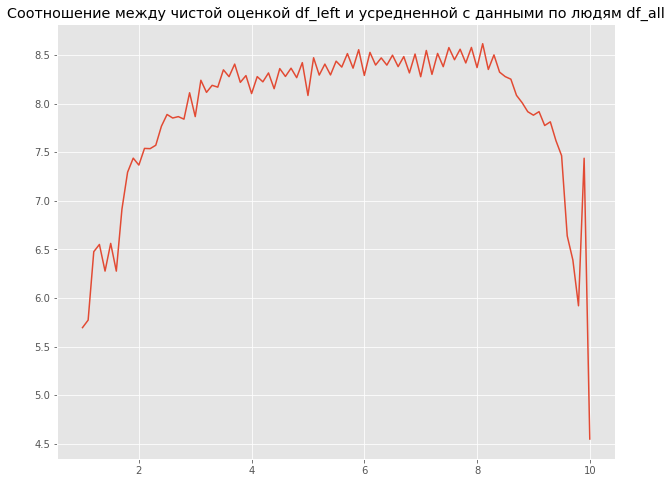

In [146]:
plt.plot((df_all.averageRating.value_counts().head(91)/df_left.averageRating.value_counts().head(91)).index,
         df_all.averageRating.value_counts().head(91)/df_left.averageRating.value_counts().head(91))
plt.title('Соотношение между чистой оценкой df_left и усредненной с данными по людям df_all')
plt.grid(1)
plt.show()

In [114]:
df_left.averageRating.value_counts().head(10) # мода 7.2 - больше среднего на 0.4

7.2    35289
7.0    33910
7.8    33879
7.6    33251
7.4    32988
6.8    31464
8.0    31126
7.3    29898
7.5    29672
7.7    29532
Name: averageRating, dtype: int64

In [66]:
mu = df_left.averageRating.mean()
mu

6.886222569255134

In [153]:
sigma=np.std(df_left.averageRating)
sigma

1.4002958129408385

<h5> распределение сжатое, поэтому в sigma диапазон вмещается не 68, а 71 %

In [158]:
in_1_sigma = df_left.loc[(df_left['averageRating'] > mu-sigma) & 
                         (df_left['averageRating'] < mu+sigma), 'averageRating'].count()
in_1_sigma/df_left.averageRating.count()

0.7138569219205471

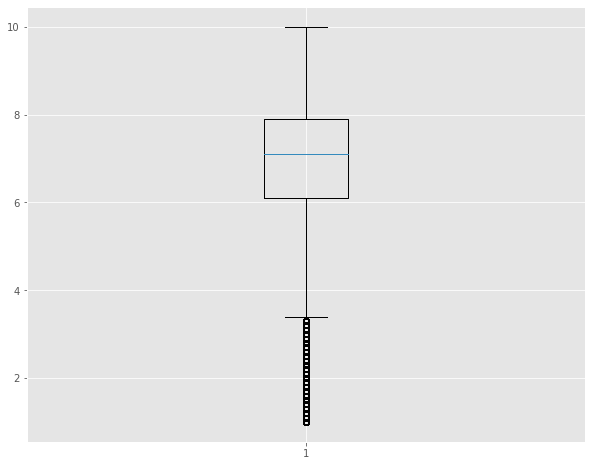

In [109]:
plt.boxplot(df_left.averageRating)
plt.show()

<h6> Из приведенного qq-графика видно, что слегка смещено распределение к средней оценке 6.8

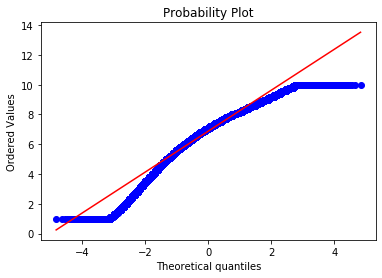

In [23]:
stats.probplot(df_left.averageRating,dist="norm",plot=pylab)
pylab.show()

<h6> Все объяснимо: люди чаще обычног тукают 1, когда не нравится, тыкают 10, когда нравится, когда что-то хорошее или посредственное, то чаще всего 7 или 6. Что-то низкое (2-5) или высокое (8-9) люди ставят реже. Величина распределена далеко не нормально, но имеет что-то схожее из-за добавления десятичных знаков при усреднении дискретной оценки из баллов.
    Если бы мат ожидание было в районе 5, то людям бы было безразлично, смотрят они фильмы или нет. 6.88 говорит о том, что фильмы чаще нравятся, поэтому на них и есть спрос.

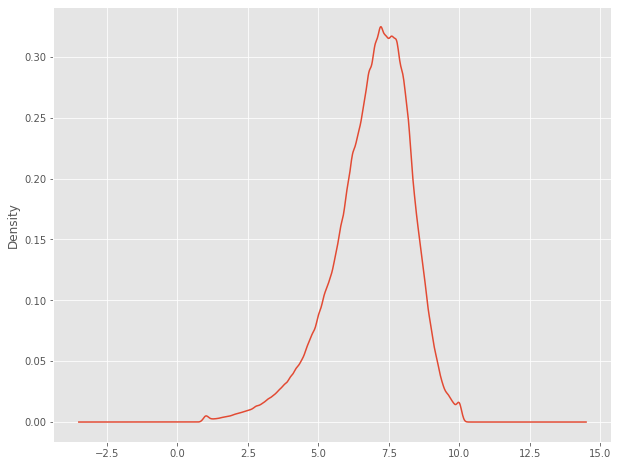

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]
plt.grid(1)
df_left.averageRating.plot.kde()

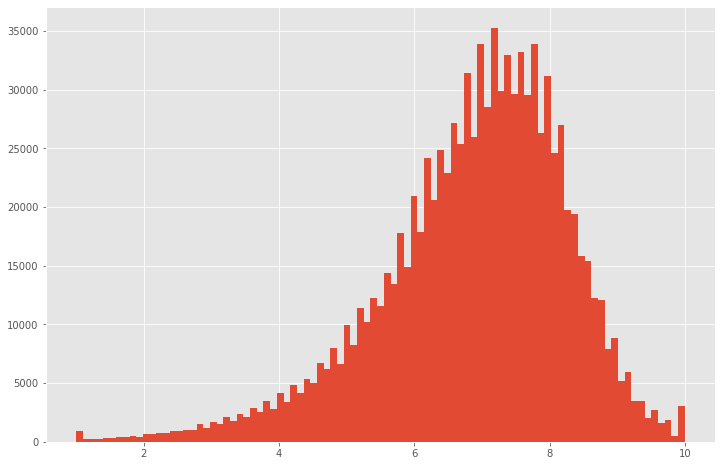

In [35]:
# Вероятность исхода = 0.3
# binom_sim = data = stats.binom.rvs(n = 20, p =0.3, size = 1000)
plt.hist(df_left.averageRating, bins = len(df_left.averageRating.value_counts()), density = False)
plt.grid(1)
plt.rcParams['figure.figsize'] = [10, 8]
matplotlib.style.use('ggplot')
plt.show()

In [26]:
# matplotlib.use('TkAgg') # выводит графики в отдельном окне

In [94]:
len(df_left.averageRating.value_counts())

91

<h5> Найдем распределения для самых популярных пяти жанров

In [160]:
df_left.genres.value_counts().head()


Comedy                        89083
Drama                         74911
Documentary                   55109
Action,Adventure,Animation    26523
Reality-TV                    21138
Name: genres, dtype: int64

In [158]:
Comedy = df_left.loc[df_left.genres.str.contains('Comedy', case=False, na=False), 'averageRating']
Drama = df_left.loc[df_left.genres.str.contains('Drama', case=False, na=False), 'averageRating']
Documentary = df_left.loc[df_left.genres.str.contains('Documentary', case=False, na=False), 'averageRating']
Animation = df_left.loc[df_left.genres.str.contains('Animation', case=False, na=False), 'averageRating']
Action = df_left.loc[df_left.genres.str.contains('Action', case=False, na=False), 'averageRating']
[len(Comedy),len(Drama),len(Documentary),len(Animation),len(Action)]

[315982, 325159, 115508, 108165, 115307]

In [163]:
df_genre = pd.concat((Comedy,Drama,Documentary,Animation,Action),axis=1)
df_genre.columns=['Comedy','Drama','Documentary','Animation','Action']
df_genre.describe()

,Comedy,Drama,Documentary,Animation,Action
count,315982.000000,325159.000000,115508.000000,108165.000000,115307.000000
mean,6.919186,7.018507,7.241429,7.046735,6.951038
std,1.353608,1.321164,1.217808,1.240377,1.412571
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.200000,6.300000,6.600000,6.400000,6.200000
50%,7.100000,7.200000,7.400000,7.200000,7.200000
75%,7.900000,7.900000,8.000000,7.900000,7.900000
max,10.000000,10.000000,10.000000,10.000000,10.000000


<h5> С учетом комбинированных жанров самое высокое мат ожидание имеет документальный фильм, комедия на 4-м месте

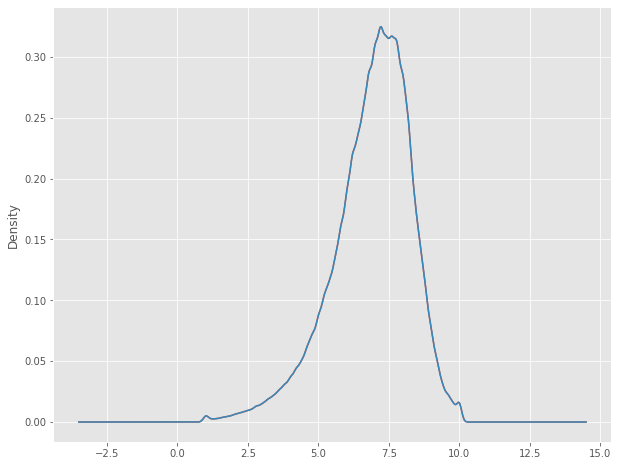

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]
plt.grid(1)
df_left.averageRating.plot.kde()
# df_left.averageRating.plot.kde()

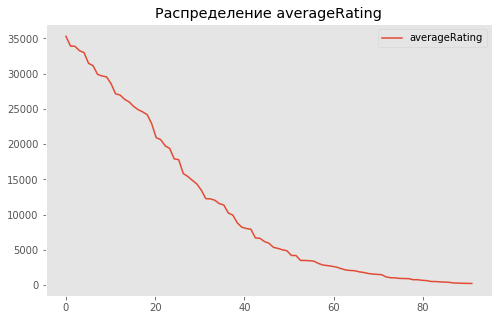

In [64]:
# Построение графика
x = np.linspace(0, len(df_left.averageRating.value_counts()), len(df_left.averageRating.value_counts()))
fig, ax = plt.subplots()
ax.plot(x, df_left.averageRating.value_counts(), label = 'averageRating')
ax.hist(df_left.averageRating, bins = len(df_left.averageRating.value_counts()), density = False)

ax.set_title("Распределение averageRating")
ax.legend()
ax.grid()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

# plt.scatter(zp,ks)
# plt.plot(x,df_all.averageRating)
# plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

f=pd.Series([173, 175, 180, 178, 177, 185, 183, 182])
h=pd.Series([177, 179, 180, 188, 177, 172, 171, 184, 180])
s=pd.Series([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

stats.f_oneway(f,h,s)

F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)

Для уровня значимости alpha=5%, значение pv = 0.0104 явно меньше, что означнает, что выбираем альтернативную теорию H1 - различий между спортсменами нет.
Но если мы выберем уровень значимости alpha=1%, значение pv будет почти равно. Тут я бы выбрал теорию H0, так как pv чуть-чуть, но больше - раздичие в росте есть.

In [ ]:
# далее просто добавил код, проверять не надо
# тему курсового не выбрал, завтра напишу в личку, чтобы посоветоваться

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.concat([f,h,s], axis=1)
df.columns = ['Футболисты','Хоккеисты','Штангисты']
df

,Футболисты,Хоккеисты,Штангисты
0,173.0,177.0,172
1,175.0,179.0,173
2,180.0,180.0,169
3,178.0,188.0,177
4,177.0,177.0,166
5,185.0,172.0,180
6,183.0,171.0,178
7,182.0,184.0,177
8,NaN,180.0,172
9,NaN,NaN,166


In [46]:
df.index.name = 'index'
df.fillna(0)

,Футболисты,Хоккеисты,Штангисты
index,,,
0,173.0,177.0,172
1,175.0,179.0,173
2,180.0,180.0,169
3,178.0,188.0,177
4,177.0,177.0,166
5,185.0,172.0,180
6,183.0,171.0,178
7,182.0,184.0,177
8,0.0,180.0,172


In [47]:
lm_model = ols('index ~ C(Футболисты)*C(Хоккеисты)*C(Штангисты)', data=df).fit()
lm_model.pvalues

PatsyError: Error evaluating factor: NameError: name 'index' is not defined
    index ~ C(Футболисты)*C(Хоккеисты)*C(Штангисты)
    ^^^^^

In [ ]:
table=sm.stats.anova_lm(lm_model, typ=2)
table